# Chi Square

## import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("dataset_2.csv")

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


## split into train and test

In [4]:
fs = data.drop(labels="target",axis=1)
dv = data["target"]
x_train,x_test , y_train, y_test = train_test_split(fs,dv,test_size=0.3,random_state=0)
x_train.shape , x_test.shape

((35000, 108), (15000, 108))

## Apply Chi Square

In [5]:
# To rank all features

chi_ls = []

for feature in x_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, x_train[feature])
    
    # chi_test
    ch_square_value = chi2_contingency(c)[0]
    chi_ls.append(ch_square_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

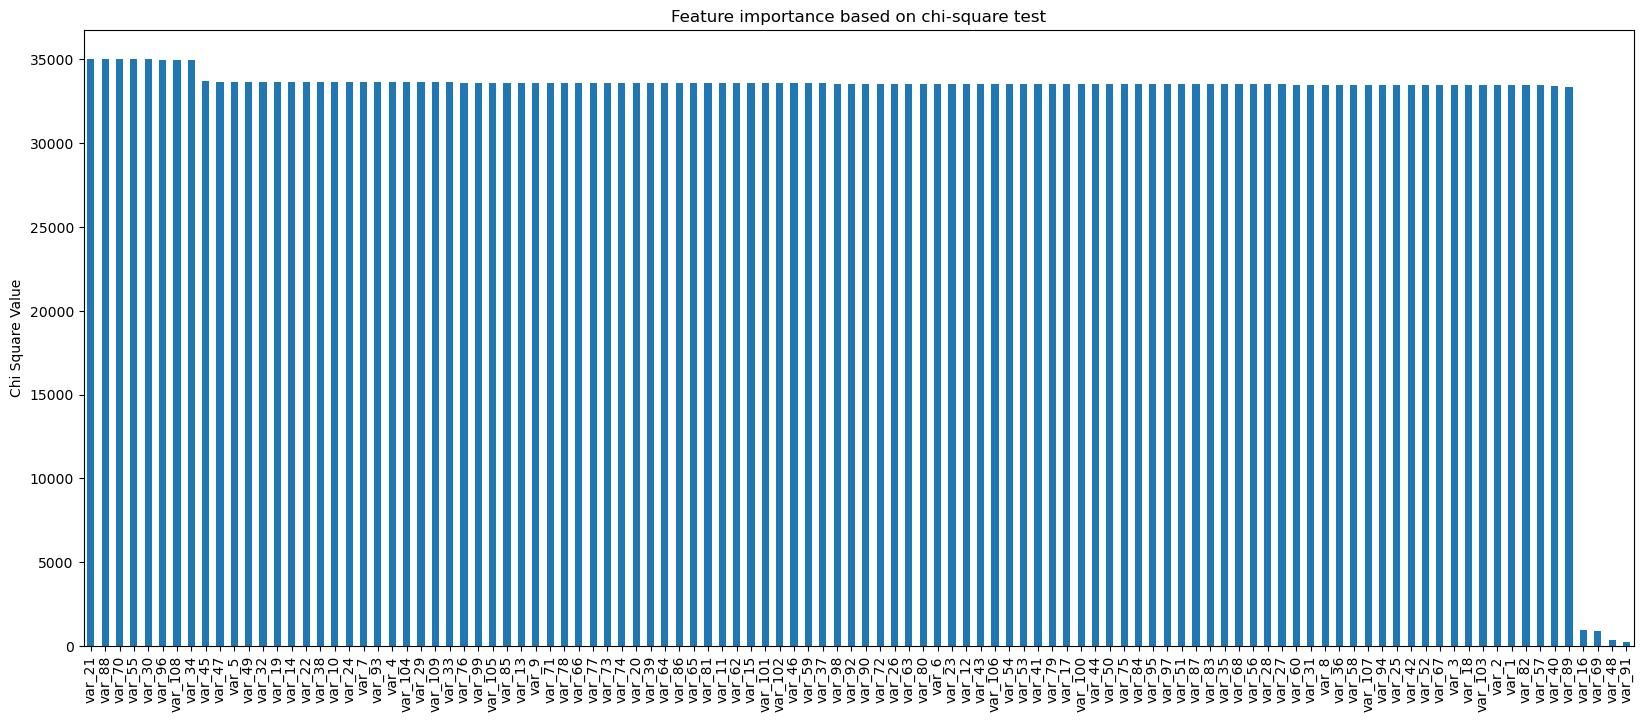

In [6]:
pd.Series(chi_ls, index=x_train.columns).sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.ylabel('Chi Square Value')
plt.title('Feature importance based on chi-square test')

In [7]:
# Select the top features
Selected = pd.Series(chi_ls, index=x_train.columns).sort_values(
    ascending=False)[0:10].index


In [8]:
Selected

Index(['var_21', 'var_88', 'var_70', 'var_55', 'var_30', 'var_96', 'var_108',
       'var_34', 'var_45', 'var_47'],
      dtype='object')